<a href="https://colab.research.google.com/github/superbunny38/2021MachineLearning/blob/main/seminar/ImplementationofDecisionTree(Concept).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Criterion of best splitting point

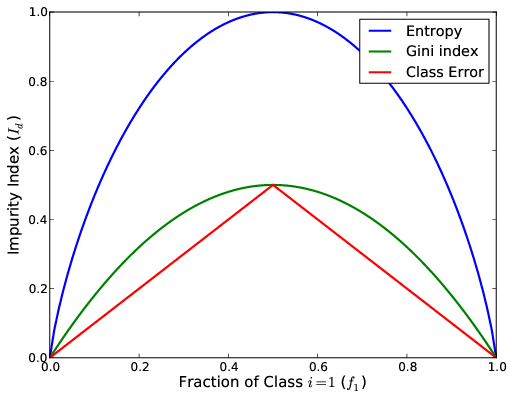

### Gini impurity

$$Gini\, Impurity = 1- \sum^K_{k=1}f_k^2$$

- $K$: number of classes
- $f_k$: fraction of class k takes up of the entire dataset

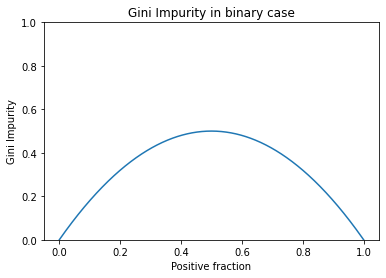

In [47]:
# Plot Gini Impurity in binary case
pos_fraction = np.linspace(0.00, 1.00, 1000)
gini = 1 - pos_fraction**2 - (1-pos_fraction)**2
plt.title("Gini Impurity in binary case")
plt.plot(pos_fraction, gini)
plt.xlabel('Positive fraction')
plt.ylabel('Gini Impurity')
plt.ylim(0, 1)
plt.show()

In [63]:
# Given labels of a data set, the Gini Impurity calculation function
def gini_impurity(labels):
    # When the set is empty, it is also pure
    if not labels:
        return 0
    # Count the occurrences of each label
    counts = np.unique(labels, return_counts=True)[1]
    fractions = counts / float(len(labels))
    return 1 - np.sum(fractions ** 2)

In [64]:
#example    
dataset1 = [1, 1, 0, 1, 0]
dataset2 = [1, 1, 0, 1, 0, 0]
dataset3 = [1, 1, 1, 1]

print('dataset:',dataset1,end = " | ")
print('entropy: {0:.4f}'.format(gini_impurity(dataset1)))
print('dataset:',dataset2,end = " | ")
print('entropy: {0:.4f}'.format(gini_impurity(dataset2)))
print('dataset:',dataset3,end = " | ")
print('entropy: {0:.4f}'.format(gini_impurity(dataset3)))

dataset: [1, 1, 0, 1, 0] | entropy: 0.4800
dataset: [1, 1, 0, 1, 0, 0] | entropy: 0.5000
dataset: [1, 1, 1, 1] | entropy: 0.0000


### Entropy

$$Entropy = -\sum_{k=1}^K f_k  log_2 f_k$$

- $K$: number of class
- $f_k$: fraction of data from class k


$$Information\, Gain = Entropy(before\, split)-Entropy(after\, split)$$


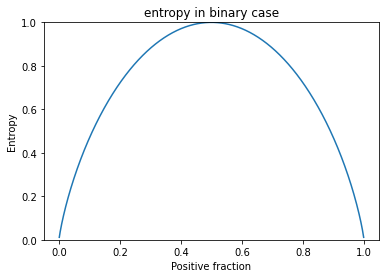

In [53]:
# Plot entropy in binary case
pos_fraction = np.linspace(0.00, 1.00, 1000)
ent = - (pos_fraction * np.log2(pos_fraction) + (1 - pos_fraction) * np.log2(1 - pos_fraction))
plt.plot(pos_fraction, ent)
plt.title("entropy in binary case")
plt.xlabel('Positive fraction')
plt.ylabel('Entropy')
plt.ylim(0, 1)
plt.show()

In [60]:
# Given labels of a data set, the entropy calculation function
def entropy(labels):
    if not labels:
        return 0
    counts = np.unique(labels, return_counts=True)[1]
    fractions = counts / float(len(labels))
    return - np.sum(fractions * np.log2(fractions))

In [61]:
#example    
dataset1 = [1, 1, 0, 1, 0]
dataset2 = [1, 1, 0, 1, 0, 0]
dataset3 = [1, 1, 1, 1]

print('dataset:',dataset1,end = " | ")
print('entropy: {0:.4f}'.format(entropy(dataset1)))
print('dataset:',dataset2,end = " | ")
print('entropy: {0:.4f}'.format(entropy(dataset2)))
print('dataset:',dataset3,end = " | ")
print('entropy: {0:.4f}'.format(entropy(dataset3)))

dataset: [1, 1, 0, 1, 0] | entropy: 0.9710
dataset: [1, 1, 0, 1, 0, 0] | entropy: 1.0000
dataset: [1, 1, 1, 1] | entropy: -0.0000


In [65]:
def information_gain(y, mask, func=entropy):
    s1 = np.sum(mask)
    s2 = mask.size - s1
    if (s1 == 0 | s2 == 0): return 0
    return func(y) - s1 / float(s1 + s2) * func(y[mask]) - s2 / float(s1 + s2) * func(y[np.logical_not(mask)])

the choice of two metrics(Gini Index, Entropy) has little effect on the performance of the trained decision tree.

In [67]:
# Weighted Impurity: combine two metrics into one function

criterion_function = {'gini': gini_impurity, 'entropy': entropy}
def weighted_impurity(groups, criterion='gini'):
    """ Calculate weighted impurity of children after a split
    Args:
        groups (list of children, and a child consists a list of class labels)
        criterion (metric to measure the quality of a split, 'gini' for Gini Impurity or 'entropy' for Information Gain)
    Returns:
        float, weighted impurity
    """
    total = sum(len(group) for group in groups)
    weighted_sum = 0.0
    for group in groups:
        weighted_sum += len(group) / float(total) * criterion_function[criterion](group)
    return weighted_sum

In [ ]:
#example

children_1 = [[1, 0, 1], [0, 1]]
children_2 = [[1, 1], [0, 0, 1]]
print('Entropy of #1 split(children_1): {0:.4f}'.format(weighted_impurity(children_1, 'entropy')))
print('Entropy of #2 split: {0:.4f}'.format(weighted_impurity(children_2, 'entropy')))

### Utility Functions

In [20]:
#gini index & entropy with numpy
def entropy(labels):
  #when the dataset is empty, it is also pure (entropy = 0)
  if labels.size == 0:
    return 0
  counts = np.unique(labels, return_counts = True)[1]
  fractions = counts/float(len(labels))#f_k
  #print("f_k:",fractions)
  return -np.sum(fractions*np.log2(fractions))

def gini_impurity(labels):
  #When the set is empty, it is also pure(impurity = 0)
  if labels.size == 0:
    return 0
  
  #Count the occurrences of each label
  counts = np.unique(labels, return_counts = True)[1]
  fractions = counts/float(len(labels))#f_k
  #print("f_k:",fractions)
  return 1- np.sum(fractions**2)

#Function to split a node into left and right child

def split_node(X,y,index,value):
  """Split data set X,y based on a feature and a value
  Args:
    X,y: numpy.ndarray, data set
    index: int, index of the feature used for splitting
    value: value of the feature used for splitting
    
  Returns:
    list, list: left and right child, a child is in the format of [X,y]
  """
  x_index = X[:,index]
  #if this feature is numerical
  if X[0,index].dtype.kind in ['i','f']:#int or float
    mask = x_index >= value
  
  #if this feature is categorical
  else:
    mask = x_index == value
  
  print("mask:",mask)
  #split into left and right child
  left = [X[~mask,:],y[~mask]]
  right = [X[mask,:],y[mask]]
  return left, right

In [ ]:
#greedy search function trying out all possible splits and returning the best one given a selection criterion, along with the resulting children
def get_best_split(X,y,criterion):
  """
  Obtain the best splitting point and resulting children for the dataset X,y
  Args:
    X,y (numpy.ndarray, dataset)
    criterion: gini or entropy
  Returns:
    dict {index: index of the feature, value: feature value, children: left and right children}
  """
  #Initialization
  best_index, best_value, best_score, children = None, None, 1, None

  for index in range(len(X[0])):
    for value in np.sort(np.unique(X[:,index])):
      groups = split_node(X,y,index,value)
      impurity = weighted_impurity([])
      if im